# MOwNiT – interpolacja Hermite'a

__Przygotował:__
__Szymon Budziak__

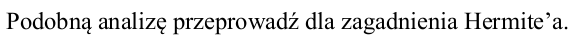

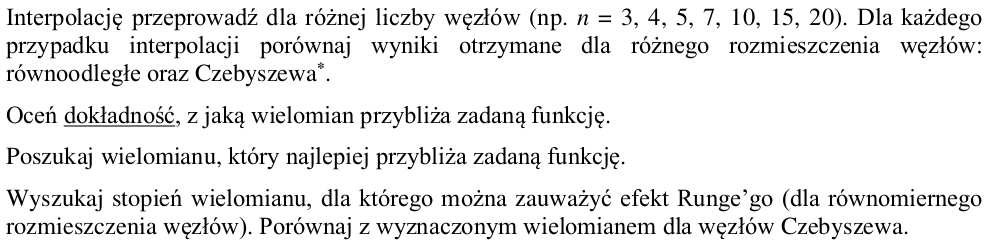

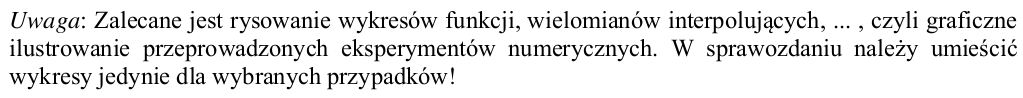

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from math import factorial

In [2]:
def even_distribution(start, stop, n):
    return np.linspace(start, stop, num=n)

In [3]:
def chebyshev_distribution(start, stop, n):
    chebyt_roots = []
    for k in range(1, n+1):
        cosin = np.cos((2*k-1)/(2*n) * np.pi)
        curr_result = 0.5*(start+stop) + 0.5*(stop-start)*cosin
        chebyt_roots.append(curr_result)
    return np.array(chebyt_roots)

## Function to interpolate

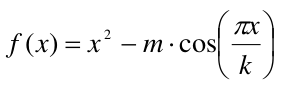

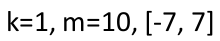

In [4]:
def func(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

In [5]:
def deriv1_func(x):
    k = 1
    m = 10
    y = 2*x + (m*np.pi*np.sin((np.pi*x) / k))/k
    return y

**Plot of the function**

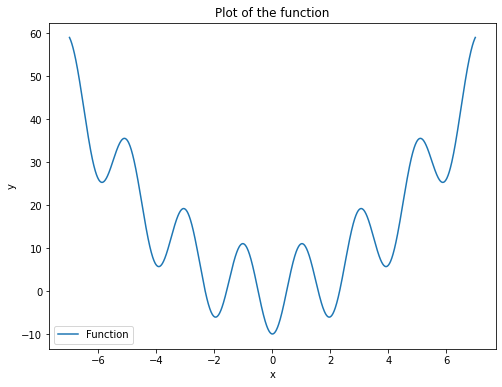

In [6]:
plt.figure(figsize=(8,6))
X = np.arange(-7, 7+0.01, 0.01)
plt.plot(X, func(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Visualization

In [7]:
def visualize(x, y, function, n, name):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(-7, 7+0.01, 0.01)
    plt.plot(X, func(X), label = "Function",color="red")
    if name == "CubicHermiteSpline":
        deriv_x = deriv1_func(x)
        f = function(x, y, deriv_x)
        plt.plot(X, f(X), label = "CubicHermiteSplin", color="blue")
    elif name == "PchipInterpolator":
        plt.plot(X, interpolate.pchip_interpolate(x, y, X), label = "PchipInterpolator", color="blue")
    elif name == "hermite_interpolation":
        deriv_x = deriv1_func(x)
        p_and_deriv = list(zip(x, deriv_x))
        plt.plot(X, function(p_and_deriv, X), label = "own hermite interpolation", color="blue")
    plt.title(f"Hermite Polynomial Interpolation on {n} nodes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Errors

In [8]:
def max_error(X1, X2):
    return max([abs(X1[i] - X2[i]) for i in range(len(X1))])

In [9]:
def sum_square_error(X1, X2):
    return sum([(X1[i] - X2[i])**2 for i in range(len(X1))])

## Hermite interpolation

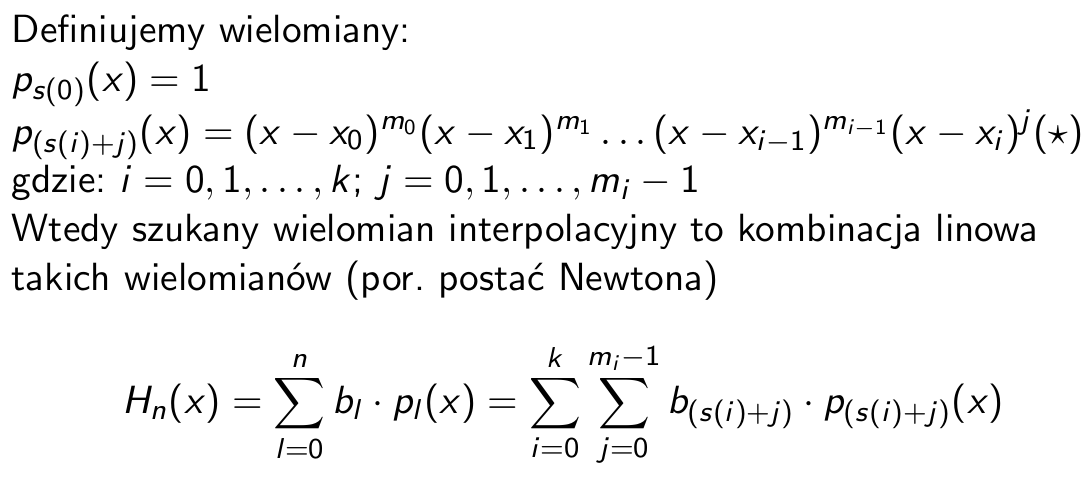

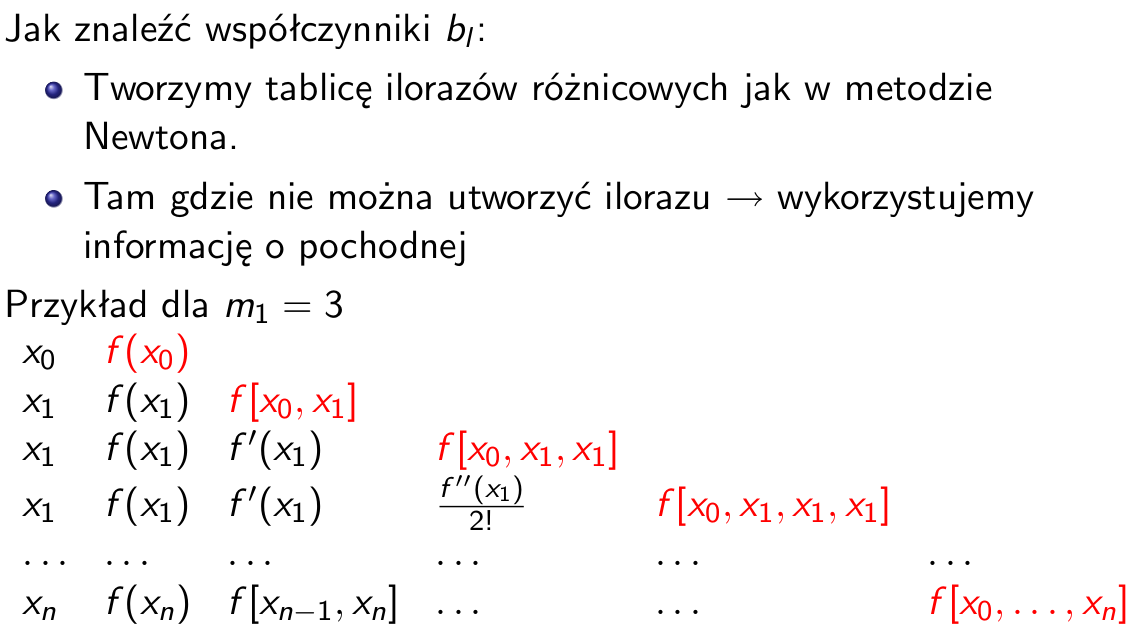

### scipy interpolate.pchip_interpolate

In [10]:
def even_hermite_scipy(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func(even_x)
    visualize(even_x, even_y, interpolate.PchipInterpolator, n, "PchipInterpolator")

In [11]:
def chebyt_hermite_scipy(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_x.sort()
    chebyt_y = func(chebyt_x)
    visualize(chebyt_x, chebyt_y, interpolate.PchipInterpolator, n, "PchipInterpolator")

**n = 3**

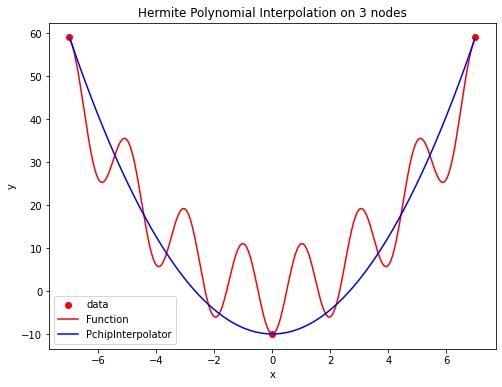

In [12]:
even_hermite_scipy(-7, 7, 3)

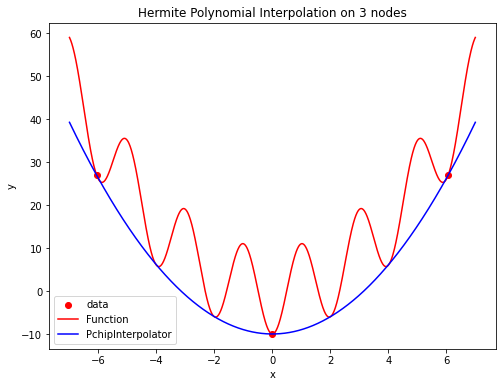

In [13]:
chebyt_hermite_scipy(-7, 7, 3)

**n = 7**

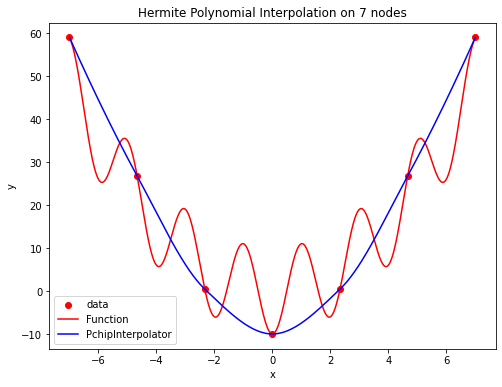

In [14]:
even_hermite_scipy(-7, 7, 7)

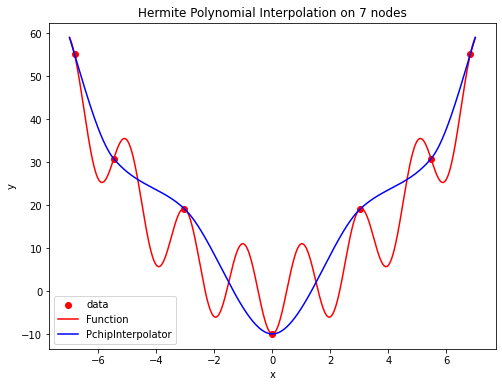

In [15]:
chebyt_hermite_scipy(-7, 7, 7)

**n = 15**

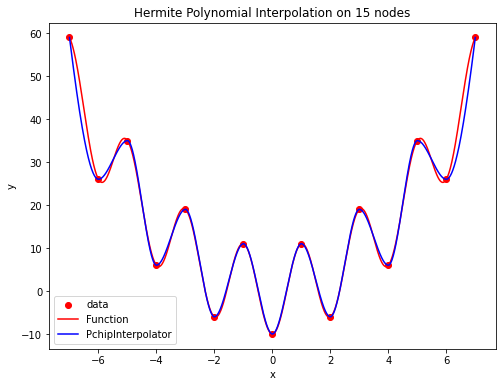

In [16]:
even_hermite_scipy(-7, 7, 15)

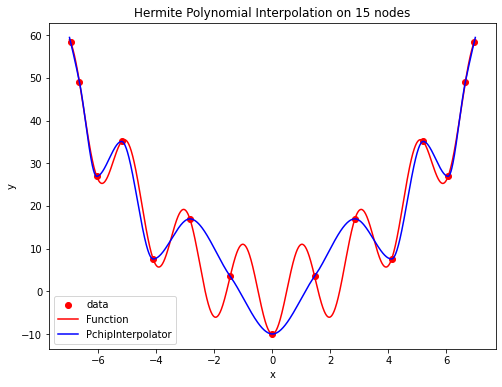

In [17]:
chebyt_hermite_scipy(-7, 7, 15)

**n = 25**

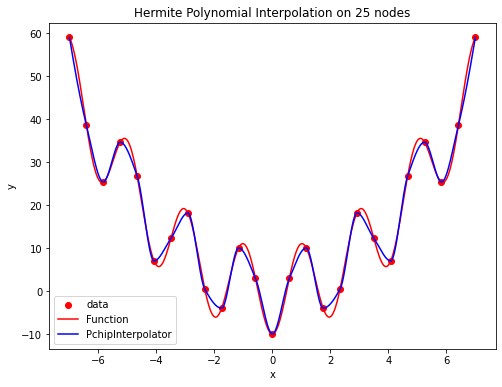

In [18]:
even_hermite_scipy(-7, 7, 25)

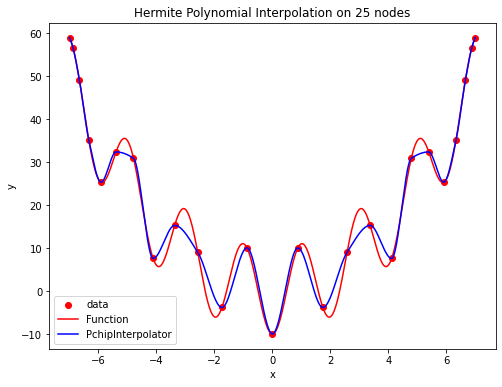

In [19]:
chebyt_hermite_scipy(-7, 7, 25)

### scipy interpolate.CubicHermiteSpline

In [20]:
def even_cubic_hermite_scipy(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func(even_x)
    visualize(even_x, even_y, interpolate.CubicHermiteSpline, n, "CubicHermiteSpline")

In [21]:
def chebyt_cubic_hermite_scipy(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func(chebyt_x)
    chebyt_x.sort()
    visualize(chebyt_x, chebyt_y, interpolate.CubicHermiteSpline, n, "CubicHermiteSpline")

**n = 5**

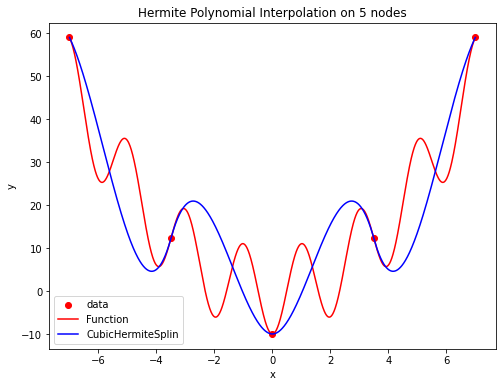

In [22]:
even_cubic_hermite_scipy(-7, 7, 5)

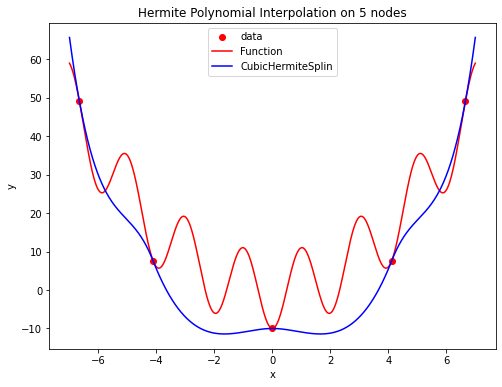

In [23]:
chebyt_cubic_hermite_scipy(-7, 7, 5)

**n = 10**

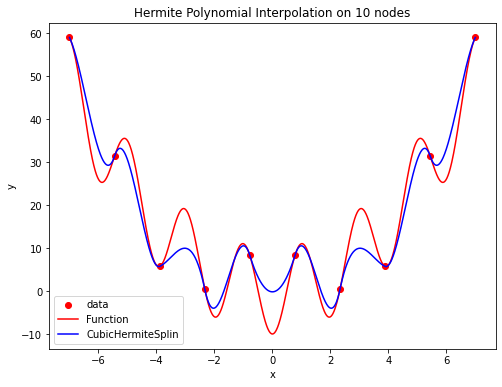

In [24]:
even_cubic_hermite_scipy(-7, 7, 10)

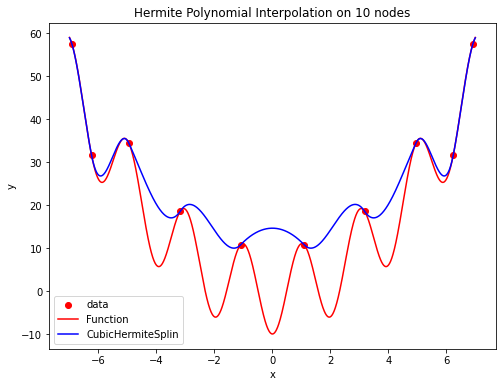

In [25]:
chebyt_cubic_hermite_scipy(-7, 7, 10)

**n = 20**

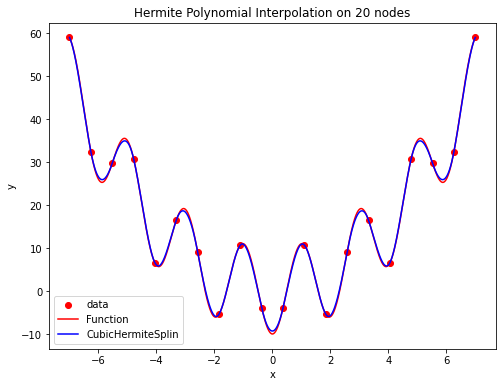

In [26]:
even_cubic_hermite_scipy(-7, 7, 20)

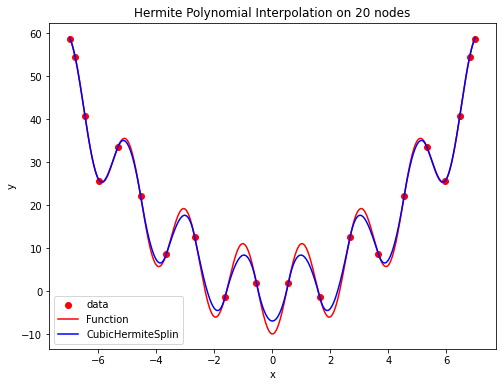

In [27]:
chebyt_cubic_hermite_scipy(-7, 7, 20)

### Hermite interpolation own implementation

In [28]:
def hermite_interpolation(points, x):
    # points is a list of tuples [(x1, x1'), (x2, x2')...]
    n = sum([len(p) for p in points])
    b_matrix = [[None for _ in range(n)] for _ in range(n)]
    
    pts_and_idx = []
    for idx, row in enumerate(points):
        for _ in range(len(row)):
            pts_and_idx.append((row[0], idx))
            
    # building rows with first collumn that is only the function
    row = 0
    for i in range(len(points)):
        for _ in range(len(points[i])):
            b_matrix[row][0] = func(points[i][0])
            row += 1
    
    # building rows with derivatives
    for i in range(1, n):
        for j in range(1, i+1):
            first_idx = pts_and_idx[i][1]
            second_idx = pts_and_idx[i-j][1]
            if points[first_idx] == points[second_idx] and j < len(points[first_idx]):
                b_matrix[i][j] = points[first_idx][j] / factorial(j)
            else:
                first_val = pts_and_idx[i][0]
                second_val = pts_and_idx[i-j][0]
                b_matrix[i][j] = (b_matrix[i][j-1] - b_matrix[i-1][j-1]) / (first_val-second_val)
            
    return sum([b_matrix[i][i] * p(points, x, i) for i in range(n)])

def p(points, x, i):
    if i == 0:
        return 1
    idx = j = 0
    result = 1
    while j < i:
        for _ in range(len(points[idx])):
            if i <= j:
                break
            result *= (x  - points[idx][0])
            j+= 1
        idx += 1
    return result

In [29]:
def even_hermite_own_implementation(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func(even_x)
    deriv_even_x = deriv1_func(even_x)
    p_and_deriv = list(zip(even_x, deriv_even_x))
    visualize(even_x, even_y, hermite_interpolation, n, "hermite_interpolation")

In [30]:
def chebyt_hermite_own_implementation(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func(chebyt_x)
    deriv_chebyt_x = deriv1_func(chebyt_x)
    p_and_deriv = list(zip(chebyt_x, deriv_chebyt_x))
    visualize(chebyt_x, chebyt_y, hermite_interpolation, n, "hermite_interpolation")

__n = 4__

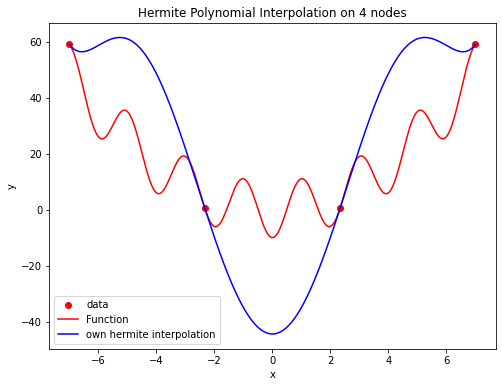

In [31]:
even_hermite_own_implementation(-7, 7, 4)

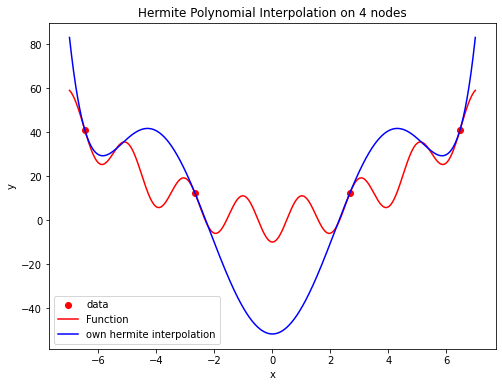

In [32]:
chebyt_hermite_own_implementation(-7, 7, 4)

__n = 7__

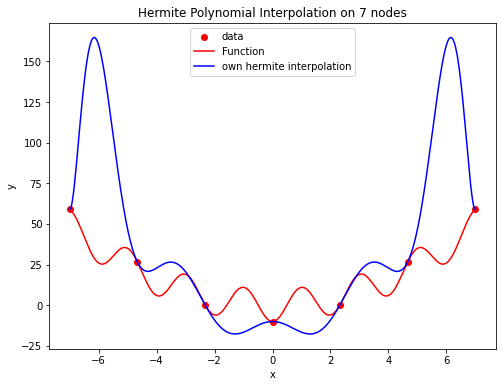

In [33]:
even_hermite_own_implementation(-7, 7, 7)

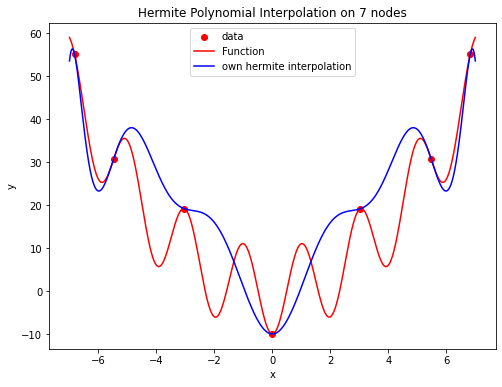

In [34]:
chebyt_hermite_own_implementation(-7, 7, 7)

__n = 15__

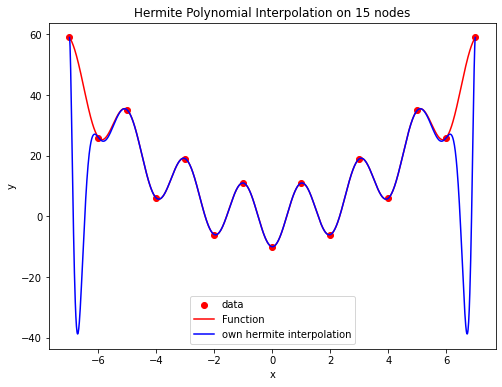

In [35]:
even_hermite_own_implementation(-7, 7, 15)

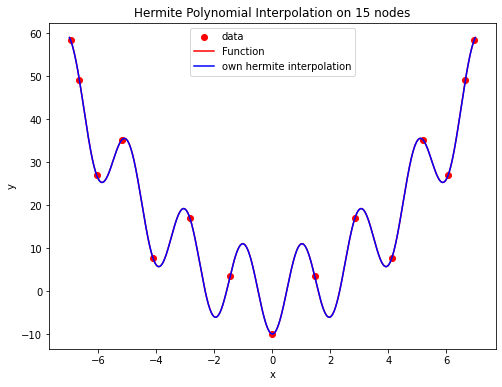

In [36]:
chebyt_hermite_own_implementation(-7, 7, 15)

__n = 20__

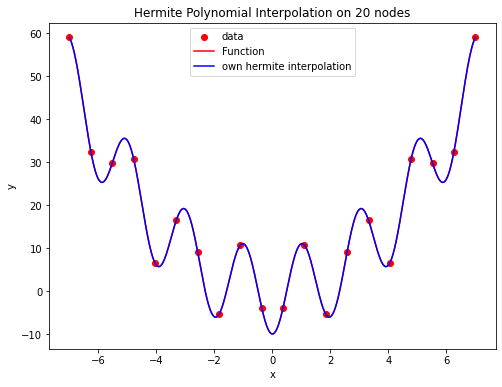

In [37]:
even_hermite_own_implementation(-7, 7, 20)

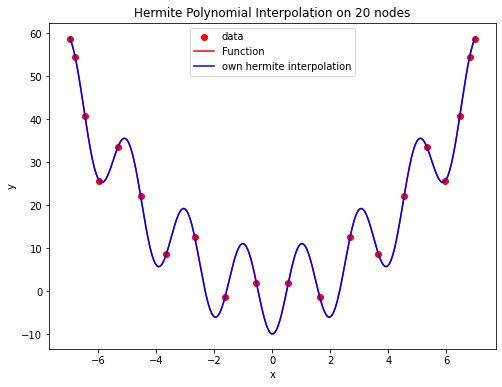

In [38]:
chebyt_hermite_own_implementation(-7, 7, 20)

## Error for Hermite interpolation

In [39]:
def calcualte_error(start, stop, function):
    best_n = 0
    best_max_error = best_sum_sq_error = np.inf
    nodes = [3, 4, 5, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60, 70, 80]
    max_error_list = [None for _ in range(len(nodes))]
    sum_sq_error_list = [None for _ in range(len(nodes))]
    df_result = pd.DataFrame()
    X = np.linspace(start, stop, 1000)
    for idx, n in enumerate(nodes):
        even_x = even_distribution(start, stop, n)
        even_deriv_x = deriv1_func(even_x)
        even_p_and_deriv = list(zip(even_x, even_deriv_x))
        even_inter = function(even_p_and_deriv, X)
        
        chebyt_x = chebyshev_distribution(start, stop, n)
        chebyt_deriv_x = deriv1_func(chebyt_x)
        chebyt_p_and_deriv = list(zip(chebyt_x, chebyt_deriv_x))
        chebyt_inter = function(chebyt_p_and_deriv, X)
        
        curr_max_error = max_error(even_inter, chebyt_inter)
        curr_sum_sq_error = sum_square_error(even_inter, chebyt_inter)
        if curr_max_error < best_max_error and curr_sum_sq_error < best_sum_sq_error:
            best_n = n
            best_max_error = curr_max_error
            best_sum_sq_error = curr_sum_sq_error
        max_error_list[idx] = curr_max_error
        sum_sq_error_list[idx] = curr_sum_sq_error
    return pd.DataFrame(data={"n":nodes, "max error": max_error_list, "sum square error":sum_sq_error_list})

In [40]:
hermite_df = calcualte_error(-7, 7, hermite_interpolation)
hermite_df

,n,max error,sum square error
0,3,1.958055e+01,1.667347e+05
1,4,3.064208e+01,2.151361e+05
2,5,5.266809e+01,8.462400e+05
3,7,1.403204e+02,2.564789e+06
4,8,2.741416e+01,3.075599e+05
5,9,6.858898e+02,4.067338e+07
6,10,1.306860e+03,1.259526e+08
7,15,9.048770e+01,3.519458e+05
8,20,6.229920e-02,1.132143e-01
9,30,2.755039e-01,3.829131e-01


In [41]:
her_idx = hermite_df["max error"].idxmin()
hermite_df["n"].iloc[her_idx]

20

Dzięki max error oraz sum square error możemy znaleźć najlepszy wielomian (jego stopień) który interpoluje naszą funkcję. W naszym przypadku jest to wielomian stopnia n = 20.

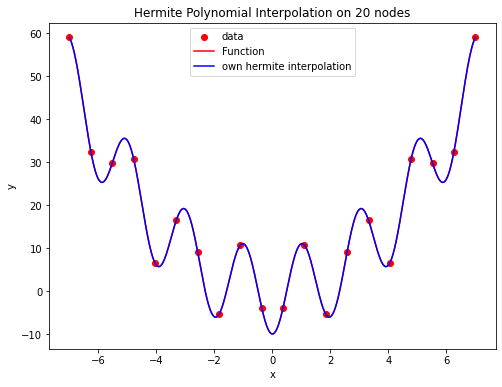

In [42]:
even_hermite_own_implementation(-7, 7, 20)

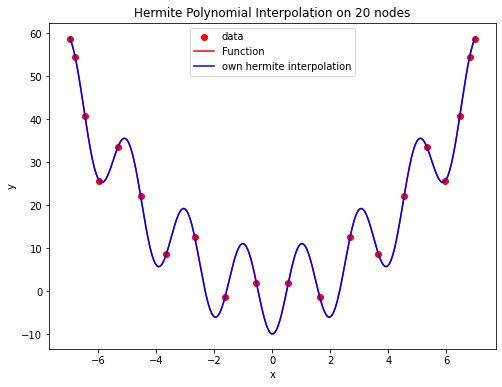

In [43]:
chebyt_hermite_own_implementation(-7, 7, 20)

## Efekt Rungego

Efekt Rungego możemy zaobserwować już dla liczby węzłów równej 7 przy rozmieszczeniu równomiernym i przy własnej implementacji (przy implementacji z biblioteki scipy efekt Rungego nie występuje tak szybko). Możemy to zaobserwować na wykresach oraz na obliczonych błędach. Zobaczmy czy wcześniej (węzeł 6) też występuje ten efekt.

__n = 6 - OK__

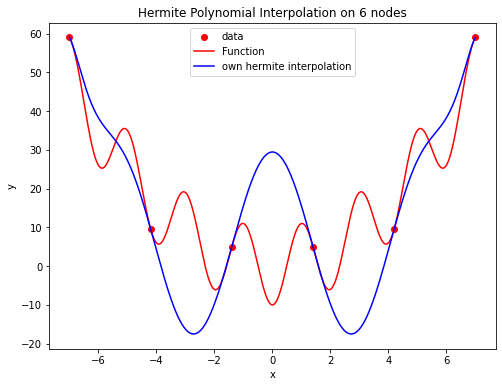

In [44]:
even_hermite_own_implementation(-7, 7, 6)

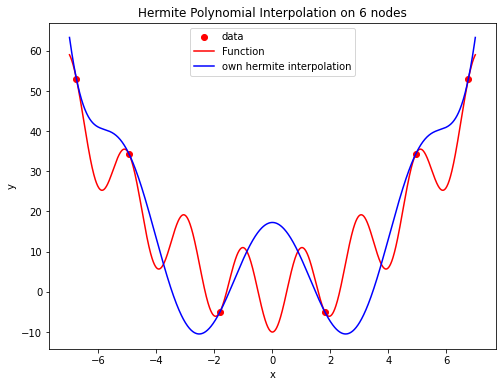

In [45]:
chebyt_hermite_own_implementation(-7, 7, 6)

__n = 7 - efekt Rungego__

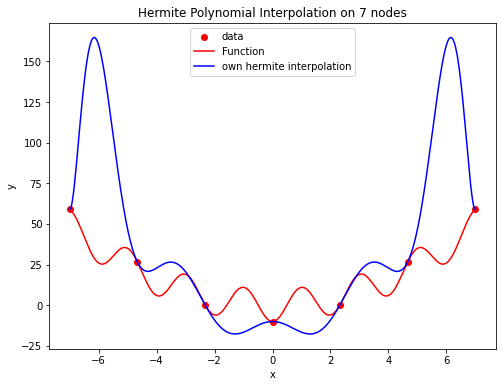

In [46]:
even_hermite_own_implementation(-7, 7, 7)

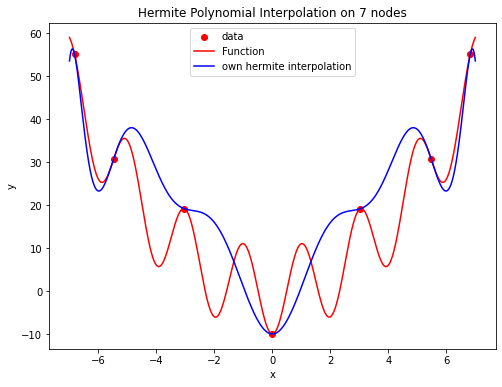

In [47]:
chebyt_hermite_own_implementation(-7, 7, 7)

__n = 9 - efekt Rungego__

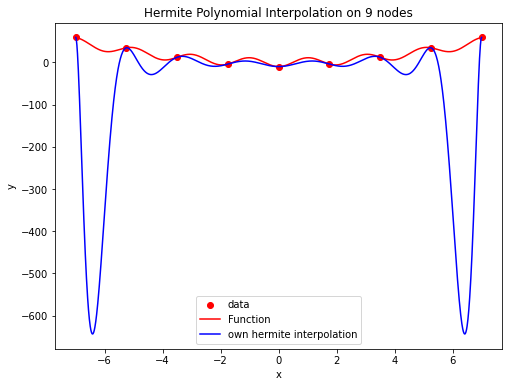

In [48]:
even_hermite_own_implementation(-7, 7, 9)

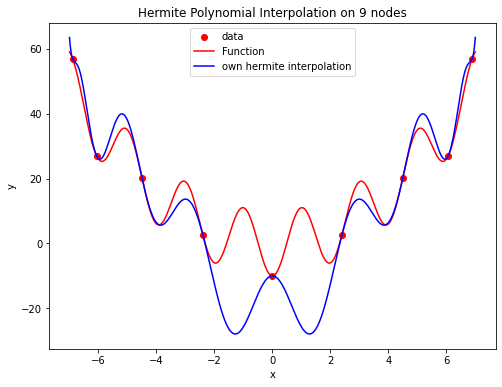

In [49]:
chebyt_hermite_own_implementation(-7, 7, 9)

__Dla porównania te same liczby węzłów oraz rozmieszczenie równomierne ale implementacja biblioteczna scipy.__

__n = 6 - OK__

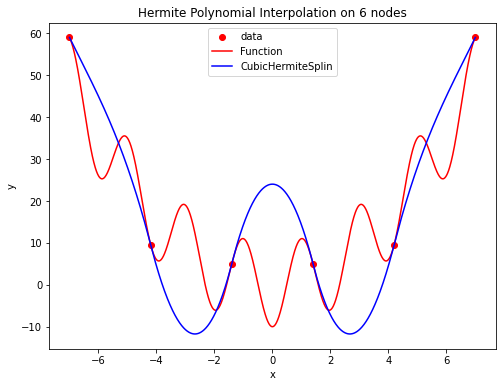

In [50]:
even_cubic_hermite_scipy(-7, 7, 6)

__n = 7 - OK__

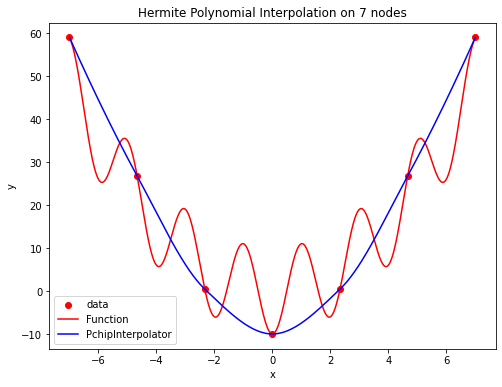

In [51]:
even_hermite_scipy(-7, 7, 7)

__n = 9 - OK__

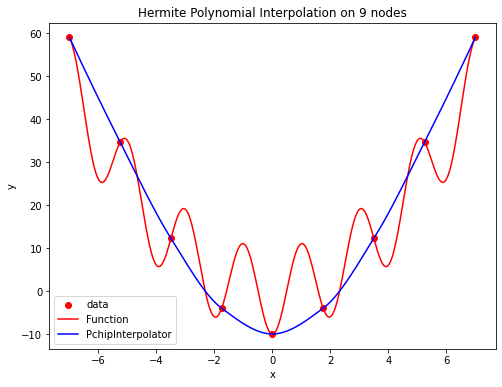

In [52]:
even_hermite_scipy(-7, 7, 9)